<a href="https://colab.research.google.com/github/MuhammadShavaiz/pytorch-google-colab/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
train_data = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform= torchvision.transforms.ToTensor(),
    target_transform = None
)
test_data = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform= torchvision.transforms.ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10609469.78it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201950.23it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3798666.00it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22168662.21it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

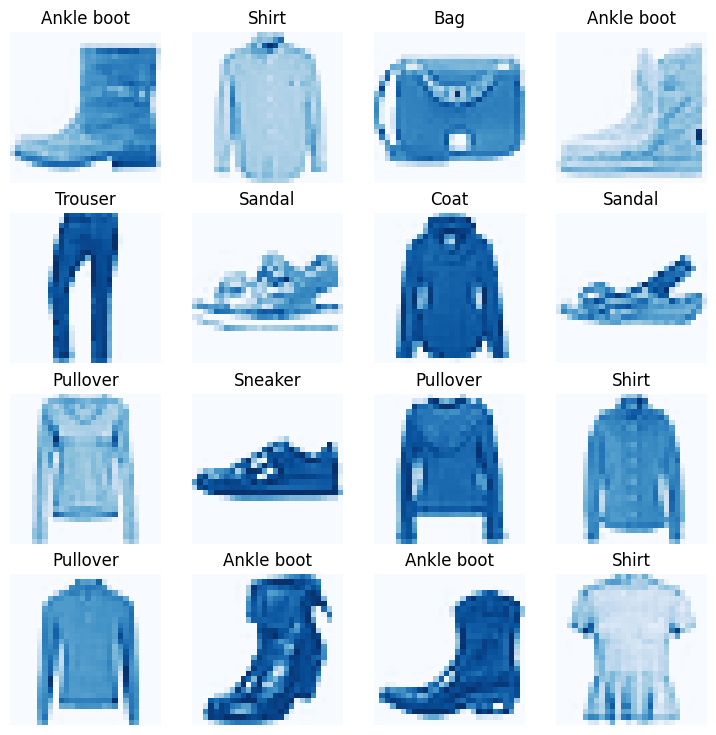

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize = (9 , 9))
rows, cols = 4 , 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap ='Blues')
  plt.title(class_names[label])
  plt.axis(False)


In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)
test_loader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x79c0c16a7a30>,
 <torch.utils.data.dataloader.DataLoader at 0x79c0c16a7b20>)

In [ ]:
train_feature_batch, train_label_batch = next(iter(train_loader))

In [ ]:
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

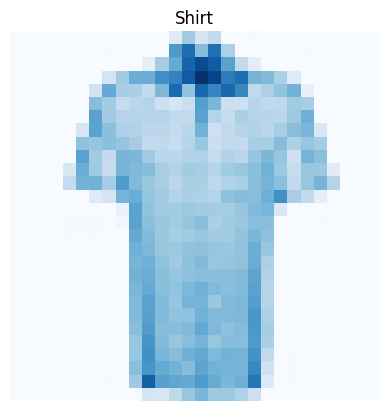

In [ ]:
torch.manual_seed(42)
rand_idx = torch.randint(0,len(train_feature_batch), size = [1]).item()
img, label = train_feature_batch[rand_idx], train_label_batch[rand_idx]
plt.imshow(img.squeeze(), cmap='Blues')
plt.title(class_names[label])
plt.axis(False)

In [ ]:
from torch import nn
class ComputerVisionmodel_0(nn.Module):
  def __init__(self, input_shape:int,
               hidden_layer:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features=hidden_layer),
        nn.Linear(in_features = hidden_layer,
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
visionmodel_0 = ComputerVisionmodel_0(
    input_shape = 784,
    hidden_layer = 10,
    output_shape = 10
).to('cpu')

In [ ]:
import requests
from pathlib import Path
if Path('helper_functions.py').is_file():
  print('file already exists, skipping downlaod')
else:
  print('downloading file')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py' , 'wb') as f:
    f.write(request.content)

downloading file


In [ ]:
from helper_functions import accuracy_fn

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = visionmodel_0.parameters(), lr = 0.1)

In [ ]:
from timeit import default_timer as timer
def start_end_time(
    start:float,
    end:float,
    device:torch.device = None):
  total_time = end-start
  print(f"tota time on {device}: {total_time:.3f} seconds")
  return total_time


In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X,y) in enumerate(train_loader):
    visionmodel_0.train()
    y_pred = visionmodel_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"looked at {batch * len(X)}/{len(train_loader.dataset)} samples")
  train_loss /= len(train_loader)
  #also implemented the below code as a function in the next cell
  test_loss = 0
  test_acc = 0
  visionmodel_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_loader:
      test_pred = visionmodel_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim = 1))
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
  print(f"train_loss: {train_loss:.4f} test_loss: {test_loss:.4f} test_acc: {test_acc:.4f}")
train_time_end = timer()
model_0_time = start_end_time(train_time_start,
                     train_time_end,
                     device = str(next(visionmodel_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples
train_loss: 0.5904 test_loss: 0.5095 test_acc: 82.0387
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples
train_loss: 0.4763 test_loss: 0.4799 test_acc: 83.1969
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples
train_loss: 0.4550 test_loss: 0.4766 test_acc: 83.4265
tota time on cpu: 30.288 seconds


In [ ]:
torch.manual_seed(42)
def model_eval(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim = 1))
    loss /= len(data_loader)
    acc /= len(data_loader)
    return{'model_name': model.__class__.__name__,
          'model_loss': loss.item(),
          'model_acc': acc}
model_0_results = model_eval(visionmodel_0, test_loader, loss_fn, accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'ComputerVisionmodel_0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [ ]:
class ComputerVisionmodel_1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_shape: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape,
                  hidden_shape),
        nn.ReLU(),
        nn.Linear(hidden_shape,
                  output_shape),
        nn.ReLU()
        )
  def forward(self, X):
    return self.layer_stack(X)

In [ ]:
torch.manual_seed(42)
visionmodel_1 = ComputerVisionmodel_1(784,
                                      10,
                                      len(class_names)).to(device)
visionmodel_1

ComputerVisionmodel_1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
loss_fn1 = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = visionmodel_1.parameters(), lr = 0.1)

In [ ]:
def training_loop(model:nn.Module,
                  dataloader:torch.utils.data.DataLoader,
                  loss_fn:nn.Module,
                  optimizer:torch.optim.Optimizer,
                  device:torch.device = device
                  ):
  total_loss = 0
  model.train()
  for batch , (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    total_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'training_loss: {total_loss/len(dataloader)}')

In [ ]:
def model_test(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device :torch.device = device):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in (data_loader):
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      loss += loss_fn(test_pred, y)
      acc += accuracy_fn(y, test_pred.argmax(dim = 1))
    loss /= len(data_loader)
    acc /= len(data_loader)
    print(f'test_loss: {loss} test_accuracy: {acc}')

In [ ]:
torch.manual_seed(42)
train_time_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch:__{epoch}')
  training_loop(visionmodel_1,train_loader, loss_fn1, optimizer, device)
  model_test(visionmodel_1, test_loader, loss_fn1, accuracy_fn, device)
train_end_gpu = timer()
model_1_time = start_end_time(train_time_gpu, train_end_gpu, device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:__0
training_loss: 1.0919920206069946
test_loss: 0.9563649296760559 test_accuracy: 64.99600638977635
Epoch:__1
training_loss: 0.7810057401657104
test_loss: 0.7222670912742615 test_accuracy: 73.91174121405751
Epoch:__2
training_loss: 0.6702709197998047
test_loss: 0.6850008964538574 test_accuracy: 75.01996805111821
tota time on cuda: 31.411 seconds


In [ ]:
torch.manual_seed(42)
def model_eval(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X , y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim = 1))
    loss /= len(data_loader)
    acc /= len(data_loader)
    return{'model_name': model.__class__.__name__,
          'model_loss': loss.item(),
          'model_acc': acc}
model_1_results = model_eval(visionmodel_1, test_loader, loss_fn1, accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'ComputerVisionmodel_1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'ComputerVisionmodel_0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [ ]:
torch.manual_seed(42)
class convmodelv1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_shape: int,
               output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_shape,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(
            in_channels = hidden_shape,
            out_channels = hidden_shape,
            kernel_size = 3,
            stride = 1,
            padding = 1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.linear = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 490,
                  out_features = output_shape)
    )

  def forward(self, X):
    X = self.block1(X)
    X = self.block2(X)
    X =  self.linear(X)
    return X

In [ ]:
cnnmodel = convmodelv1(1,10,10).to(device)

In [ ]:
loss_fn_cnn = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.SGD(params = cnnmodel.parameters(), lr = 0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer
cnn_start_time = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  training_loop(cnnmodel, train_loader, loss_fn_cnn, optimizer_cnn, device)
  model_test(cnnmodel, test_loader, loss_fn_cnn, accuracy_fn, device)
cnn_end_time = timer()
model_2_time = start_end_time(cnn_start_time, cnn_end_time, device)



  0%|          | 0/3 [00:00<?, ?it/s]

training_loss: 0.5627418160438538
test_loss: 0.4005221724510193 test_accuracy: 85.90255591054313
training_loss: 0.3770746886730194
test_loss: 0.3696594536304474 test_accuracy: 87.05071884984025
training_loss: 0.34329837560653687
test_loss: 0.3615650534629822 test_accuracy: 87.51996805111821
tota time on cuda: 43.964 seconds


In [ ]:
model_2_results = model_eval(cnnmodel, test_loader, loss_fn_cnn, accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'convmodelv1',
 'model_loss': 0.3615650534629822,
 'model_acc': 87.51996805111821}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,ComputerVisionmodel_0,0.476639,83.426518
1,ComputerVisionmodel_1,0.685001,75.019968
2,convmodelv1,0.361565,87.519968


In [ ]:
compare_results["Training_time"] = [model_0_time,
                                    model_1_time,
                                    model_2_time]
compare_results

,model_name,model_loss,model_acc,Training_time
0,ComputerVisionmodel_0,0.476639,83.426518,30.288141
1,ComputerVisionmodel_1,0.685001,75.019968,31.410625
2,convmodelv1,0.361565,87.519968,43.964291


Text(0, 0.5, 'model_name')

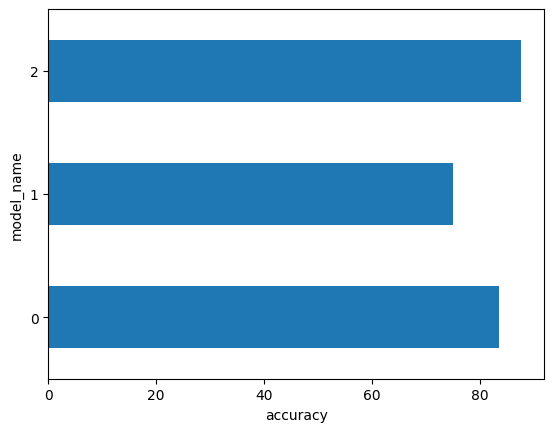

In [ ]:
compare_results.set_index('model_name')
compare_results['model_acc'].plot(kind= 'barh')
plt.xlabel('accuracy')
plt.ylabel("model_name")

In [ ]:
def make_predictions(model:nn.Module,
                     data,
                     device: torch.device = device):
  pred_prob_list = []
  model.to(device)
  model.eval
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
      pred_prob_list.append(pred_prob.cpu())
  return torch.stack(pred_prob_list)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for image, label in random.sample(list(test_data), k=9):
  test_samples.append(image)
  test_labels.append(label)

In [ ]:
pred_prob = make_predictions(cnnmodel,
                             test_samples)
pred_labels = pred_prob.argmax(dim=1)
pred_labels


tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

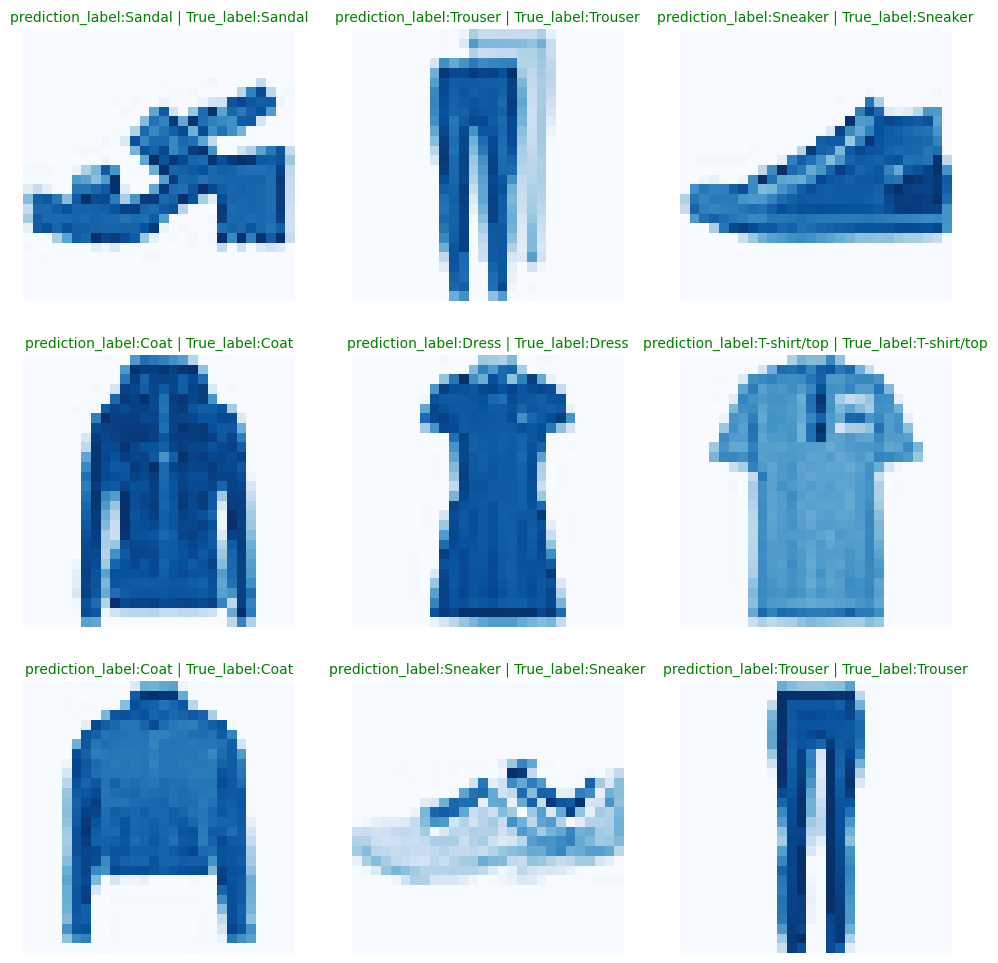

In [ ]:
plt.figure(figsize = (12,12))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows,ncols, i+1)
  plt.imshow(sample.squeeze(), cmap = 'Blues')
  prediction_label = class_names[pred_labels[i]]
  truth_labels = class_names[test_labels[i]]
  title = f"prediction_label:{prediction_label} | True_label:{truth_labels}"
  if prediction_label == truth_labels:
    plt.title(title, fontsize = 10, c='g')
  else:
    plt.title(title, c='r')
  plt.axis(False)
